In [2]:
import pycaret
import pandas as pd

In [3]:
# อ่านไฟล์ CSV
data = pd.read_csv('export_data/filtered_data_3_best.csv')

In [4]:
# ตั้ง 'timestamp' เป็น index หากยังไม่ได้ทำ
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
data = data.asfreq('D')  # 'D' สำหรับรายวัน

In [5]:
# แสดงแถวที่มีค่าหายไปก่อนเติม
print("แถวที่มีค่าหายไปก่อนเติม:")
print(data[data.isnull().any(axis=1)])

# เติมค่าที่หายไปด้วยการ interpolate แบบเส้นตรง
data.interpolate(method='linear', inplace=True)

# แสดงแถวที่ยังมีค่า NaN หลังจากเติม (ถ้ามี)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("แถวที่ยังมีค่าหายไปหลังเติม:")
    print(missing_rows_after)
else:
    print("ไม่มีค่าหายไปแล้ว")

row = data.loc["2023-09-30 07:00:00"]
row

แถวที่มีค่าหายไปก่อนเติม:
                     humidity  pm_10  pm_2_5  pm_2_5_sp  temperature
timestamp                                                           
2023-09-30 07:00:00       NaN    NaN     NaN        NaN          NaN
ไม่มีค่าหายไปแล้ว


humidity       82.889367
pm_10          60.525519
pm_2_5         53.415241
pm_2_5_sp      69.527667
temperature    29.219760
Name: 2023-09-30 07:00:00, dtype: float64

In [6]:
data = data['humidity']

<Axes: xlabel='timestamp'>

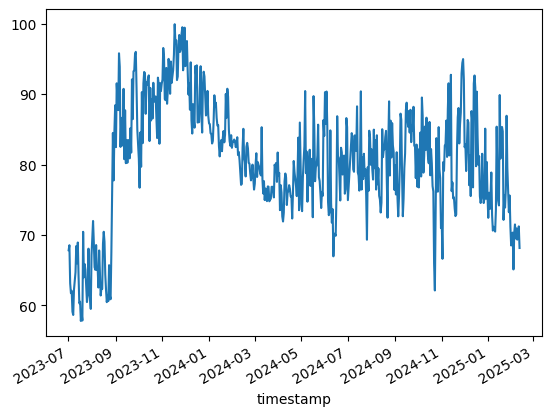

In [7]:
data.plot()

In [8]:
data_filtered = data.loc['2023-09':]  # ดึงข้อมูลตั้งแต่กันยายน 2023 เป็นต้นไป

<Axes: xlabel='timestamp'>

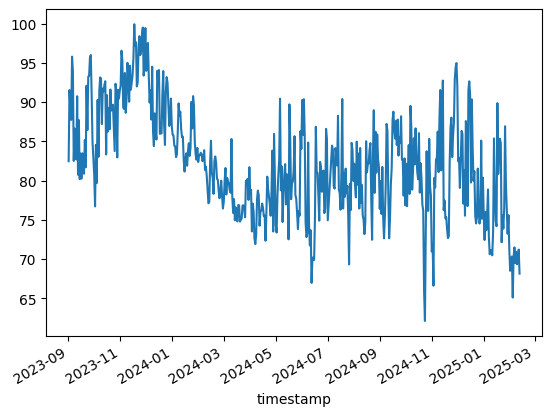

In [9]:
data_filtered.plot()

In [10]:
from pycaret.time_series import *
# ตั้งค่าของ PyCaret
s = setup(data=data_filtered, fh=30, session_id=123, seasonal_period=30)

,Description,Value
0,session_id,123
1,Target,humidity
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(530, 1)"
5,Transformed data shape,"(530, 1)"
6,Transformed train set shape,"(500, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [11]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9493,0.9595,5.1631,6.4949,0.0670,0.0646,0.0015,0.4233
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0943,1.0933,5.9304,7.3806,0.0755,0.0742,-0.3071,0.2667
polytrend,Polynomial Trend Forecaster,1.1050,1.0999,5.9941,7.4426,0.0728,0.0750,-0.3368,0.5833
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.1091,1.0966,5.9955,7.3815,0.0763,0.0743,-0.3251,0.2867
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.1197,1.0776,6.0688,7.2742,0.0766,0.0758,-0.2745,0.4633
grand_means,Grand Means Forecaster,1.1281,1.0925,6.1456,7.4151,0.0798,0.0766,-0.3280,0.6133
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1412,1.0954,6.1986,7.4134,0.0784,0.0774,-0.3046,0.5333
croston,Croston,1.1532,1.1142,6.2889,7.5718,0.0816,0.0783,-0.4030,0.0100
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1535,1.1183,6.2793,7.5856,0.0808,0.0782,-0.3789,0.2467
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.1546,1.1087,6.2678,7.4964,0.0795,0.0782,-0.3395,0.2567


In [12]:
best = create_model('lightgbm_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-10-14,0.9590,1.0993,5.0697,7.2203,0.0693,0.0648,-0.0873
1,2024-11-13,0.9583,0.9569,5.1916,6.4582,0.0631,0.0628,0.0235
2,2024-12-13,0.9305,0.8224,5.2279,5.8062,0.0687,0.0661,0.0681
Mean,NaT,0.9493,0.9595,5.1631,6.4949,0.0670,0.0646,0.0015
SD,NaT,0.0133,0.1131,0.0676,0.5779,0.0028,0.0014,0.0653


In [13]:
tuned_rf = tune_model(best)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-10-14,1.0764,1.1638,5.6905,7.6439,0.0770,0.0724,-0.2186
1,2024-11-13,1.0036,0.9563,5.4370,6.4545,0.0656,0.0657,0.0247
2,2024-12-13,1.4005,1.2509,7.8683,8.8321,0.1042,0.0983,-1.1563
Mean,NaT,1.1602,1.1237,6.3320,7.6435,0.0823,0.0788,-0.4501
SD,NaT,0.1725,0.1236,1.0913,0.9706,0.0162,0.0141,0.5091


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.5s finished


In [14]:
plot_model(best, plot = 'forecast')

In [15]:
x = predict_model(best, fh = 30)
x

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.7381,0.7682,4.3493,5.6622,0.0567,0.0573,0.1493


,y_pred
2025-01-13,79.6041
2025-01-14,79.0661
2025-01-15,75.2929
2025-01-16,76.1709
2025-01-17,76.5904
2025-01-18,76.4994
2025-01-19,74.3674
2025-01-20,71.6042
2025-01-21,74.3681
2025-01-22,73.8930


In [16]:
final_best = finalize_model(best)

In [17]:
x = predict_model(final_best, fh=60)
x

,y_pred
2025-02-12,75.9010
2025-02-13,75.2417
2025-02-14,70.4877
2025-02-15,72.0659
2025-02-16,71.8311
2025-02-17,72.0742
2025-02-18,69.7895
2025-02-19,70.5329
2025-02-20,67.0661
2025-02-21,67.5878


<Axes: >

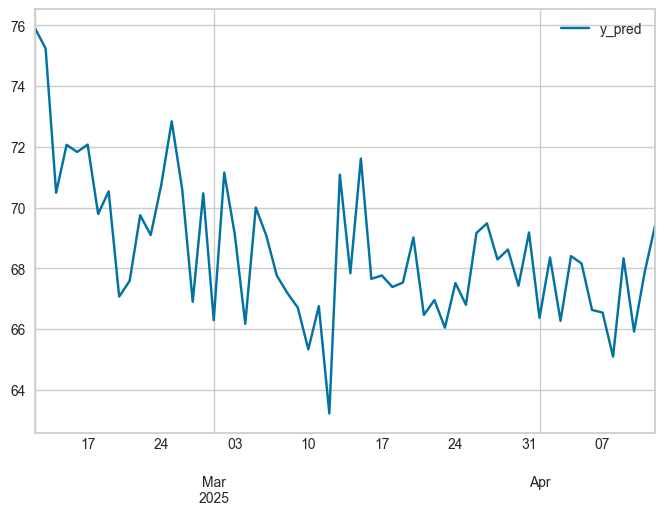

In [18]:
x.plot()

In [19]:
plot_model(final_best, plot = 'forecast')

In [20]:
# save pipeline
save_model(best, 'humi_eng')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [30,
                                                                                                                                         29,
                                                                                                                                         28,
                                                                                                                                         27,
                                                                                                                                         26,
                                                                                                                                         25,
                                     